In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from scipy.stats import shapiro

In [2]:
data = pd.read_excel("/Users/terriblepollo/Desktop/Capstone/Junaeb_github/raciones2.xlsx")

In [3]:
data.head()

,Rbd,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,...,Junio$,Julio$,Agosto$,Septiembre$,Octubre$,Noviembre$,Diciembre$,Total$,Promedio mensual$,Promedio mensual efectivo$
0,2102,0,0,22761,24732,24307,23270,13673,24307,21567,...,14194224,28388448,14194224,28685391,14342695,14342695,14540624,177480877,1.479007e+07,17748087.7
1,2103,0,0,23951,24921,21848,21024,12908,21633,19259,...,14593258,28331443,14165721,14313895,28627790,14313895,14511426,178132122,1.484434e+07,17813212.2
2,2104,0,0,32349,35693,35835,34242,19851,35919,37200,...,20008725,40017450,20008725,20218016,40436033,20218016,20497025,249813102,2.081776e+07,24981310.2
3,2105,0,0,16095,17765,17298,16488,9519,17361,14922,...,8208707,16417415,8208707,8294570,16589141,8294570,8409036,103133991,8.594499e+06,10313399.1
4,2109,0,0,17315,18504,17833,17156,10301,17833,16035,...,12313061,24626123,12313061,24883712,12441856,12441856,12613554,151814466,1.265121e+07,15181446.6


In [4]:
data.rename(columns={'Total$': 'Total_precio'}).head(1)

,Rbd,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,...,Junio$,Julio$,Agosto$,Septiembre$,Octubre$,Noviembre$,Diciembre$,Total_precio,Promedio mensual$,Promedio mensual efectivo$
0,2102,0,0,22761,24732,24307,23270,13673,24307,21567,...,14194224,28388448,14194224,28685391,14342695,14342695,14540624,177480877,1.479007e+07,17748087.7


In [10]:
filas_pre = len(data['Total'])
data['precio_racion'] = data['Total$']/data['Total']
data = data[data['precio_racion'] < 10000]
data = data[data['precio_racion'] > 0]
data = data[data['Total'] > 0]
filas_post = len(data['Total'])

data.to_excel('raciones_DL.xlsx', index=False)

print(f'''
Pre: {filas_pre}
Post: {filas_post} 
''')


Pre: 8590
Post: 8590 



Text(0.5, 1.0, 'Promedio anual de consolidado2020')

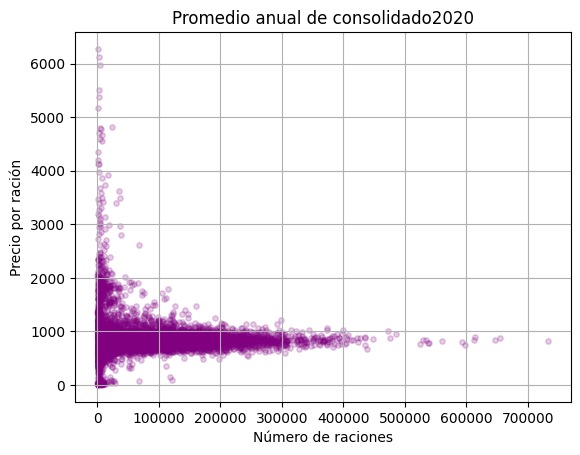

In [9]:
plt.scatter(data['Total'], data['precio_racion'], color='purple', s=15, alpha=0.2)
plt.xlabel('Número de raciones')
plt.ylabel('Precio por ración')
plt.grid(True)
plt.title('Promedio anual de consolidado2020')


In [7]:
model = smf.ols('precio_racion ~ Total', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_racion   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     33.29
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           8.20e-09
Time:                        19:24:52   Log-Likelihood:                -62347.
No. Observations:                8590   AIC:                         1.247e+05
Df Residuals:                    8588   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    889.0557      5.182    171.567      0.0

In [8]:
# Test de homocedasticidad

names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result = sms.het_breuschpagan(model.resid, model.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 90.3312017599747),
 ('p-value', 2.0145054587318526e-21),
 ('f-value', 91.26995170391763),
 ('f p-value', 1.6031772284167018e-21)]